# **Data Cleaning and Exploratory Data Analysis on Delhivery Dataset**
*by Jimalyn Del Rosario*


Kaggle link: https://www.kaggle.com/datasets/santanukundu/delhivery-dataset


## Loading dataset

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("santanukundu/delhivery-dataset")

100%|██████████| 8.72M/8.72M [00:00<00:00, 140MB/s]

Extracting files...


In [ ]:
path

'/root/.cache/kagglehub/datasets/santanukundu/delhivery-dataset/versions/1'

In [ ]:
os.listdir(path)

['delhivery_data.csv']

## Initial dataset exploration for cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
delhivery_data = pd.read_csv(os.path.join(path, "delhivery_data.csv"))

In [ ]:
delhivery_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
delhivery_data.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [ ]:
delhivery_data.shape

(144867, 24)

In [ ]:
delhivery_data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
delhivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
delhivery_data.duplicated().sum()

np.int64(0)

In [ ]:
delhivery_data.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
object_type = delhivery_data.dtypes == 'object'
numerical_type = delhivery_data.dtypes != 'object'

In [ ]:
object_type[object_type]

,0
data,True
trip_creation_time,True
route_schedule_uuid,True
route_type,True
trip_uuid,True
source_center,True
source_name,True
destination_center,True
destination_name,True
od_start_time,True


In [ ]:
numerical_type[numerical_type]

,0
start_scan_to_end_scan,True
is_cutoff,True
cutoff_factor,True
actual_distance_to_destination,True
actual_time,True
osrm_time,True
osrm_distance,True
factor,True
segment_actual_time,True
segment_osrm_time,True


In [ ]:
cat_columns = list(object_type[object_type].index)
num_columns = list(numerical_type[numerical_type].index)

In [ ]:
category_data = delhivery_data[cat_columns]
numerical_data = delhivery_data[num_columns]

In [ ]:
category_data.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [ ]:
numerical_data.nunique()

,0
start_scan_to_end_scan,1915
is_cutoff,2
cutoff_factor,501
actual_distance_to_destination,144515
actual_time,3182
osrm_time,1531
osrm_distance,138046
factor,45641
segment_actual_time,747
segment_osrm_time,214


# **Data Cleaning**

In [ ]:
df = delhivery_data.copy()

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
# Remove Null Values
df = df.dropna()

In [ ]:
df.nunique()

,0
data,2
trip_creation_time,14787
route_schedule_uuid,1497
route_type,2
trip_uuid,14787
source_center,1496
source_name,1496
destination_center,1466
destination_name,1466
od_start_time,26223


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [ ]:
# Convert date columns to date_time data type
date_columns = ["trip_creation_time",
                "od_start_time",
                "od_end_time",
                "cutoff_timestamp"]

for col in date_columns:
  df[col] = pd.to_datetime(df[col], format='mixed')

In [ ]:
# Drop redundant columns (e.g. ID for a given route name)
redundant_columns = ["route_schedule_uuid",
                     "trip_uuid",
                     "source_center",
                     "destination_center"]

df = df.drop(columns=redundant_columns)

In [ ]:
# Drop columns whose meaning is unknown according to the kaggle source
unknown_columns = ["data",
                   "is_cutoff",
                   "cutoff_factor",
                   "cutoff_timestamp",
                   "factor",
                   "segment_factor"]

df = df.drop(columns=unknown_columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144316 non-null  datetime64[ns]
 1   route_type                      144316 non-null  object        
 2   source_name                     144316 non-null  object        
 3   destination_name                144316 non-null  object        
 4   od_start_time                   144316 non-null  datetime64[ns]
 5   od_end_time                     144316 non-null  datetime64[ns]
 6   start_scan_to_end_scan          144316 non-null  float64       
 7   actual_distance_to_destination  144316 non-null  float64       
 8   actual_time                     144316 non-null  float64       
 9   osrm_time                       144316 non-null  float64       
 10  osrm_distance                   144316 non-null  float64     

# Basic Data Analysis

In [ ]:
df.head()

,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [ ]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,NaN,NaN,NaN,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367


### Distribution of Route Types

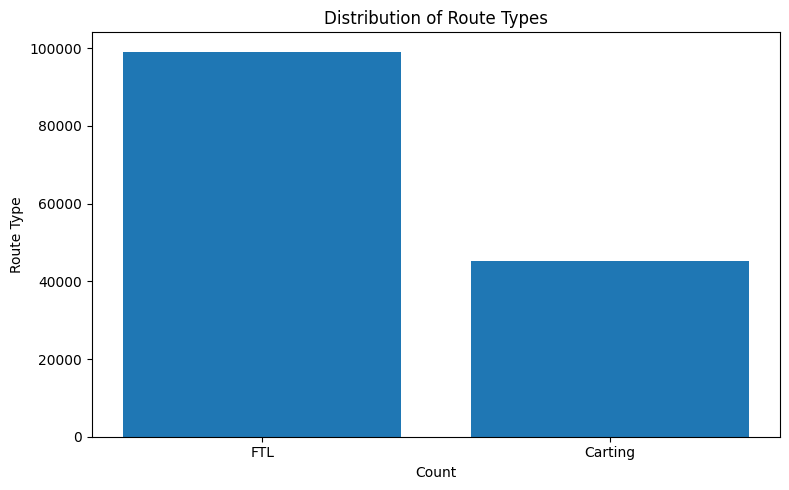

In [ ]:
route_counts = df["route_type"].value_counts()

plt.figure(figsize=(8,5))
plt.bar(route_counts.index, route_counts.values)
plt.xlabel("Count")
plt.ylabel("Route Type")
plt.title("Distribution of Route Types")
plt.tight_layout()
plt.show()


### Average segment_actual_time vs. segment_osrm_time

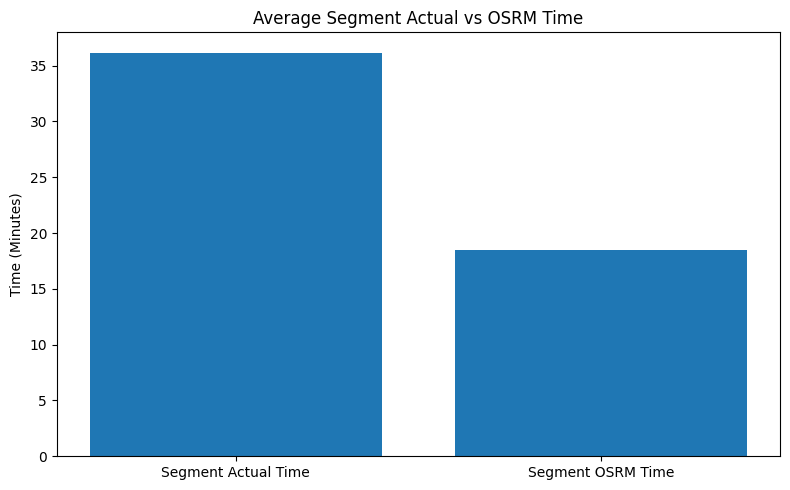

In [ ]:
# Calculate the means
labels = ['Segment Actual Time', 'Segment OSRM Time']
means = [df['segment_actual_time'].mean(), df['segment_osrm_time'].mean()]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, means)

# Add labels and title
plt.ylabel("Time (Minutes)")
plt.title("Average Segment Actual vs OSRM Time")
plt.tight_layout()
plt.show()


### Actual vs Predicted Delivery Time

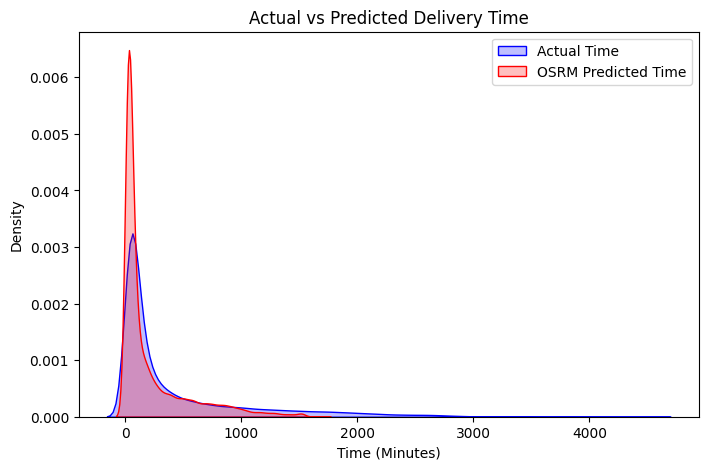

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['actual_time'], label='Actual Time', fill=True, color='blue')
sns.kdeplot(df['osrm_time'], label='OSRM Predicted Time', fill=True, color='red')
plt.xlabel("Time (Minutes)")
plt.ylabel("Density")
plt.title("Actual vs Predicted Delivery Time")
plt.legend()
plt.show()

### Top Sources and Top Destination Location

In [ ]:
df["source_name"].value_counts().head(10).to_dict()

{'Gurgaon_Bilaspur_HB (Haryana)': 23267,
 'Bangalore_Nelmngla_H (Karnataka)': 9975,
 'Bhiwandi_Mankoli_HB (Maharashtra)': 9088,
 'Pune_Tathawde_H (Maharashtra)': 4061,
 'Hyderabad_Shamshbd_H (Telangana)': 3340,
 'Kolkata_Dankuni_HB (West Bengal)': 2612,
 'Chandigarh_Mehmdpur_H (Punjab)': 2450,
 'Surat_HUB (Gujarat)': 2189,
 'Delhi_Airport_H (Delhi)': 1997,
 'Bengaluru_Bomsndra_HB (Karnataka)': 1958}

In [ ]:
df["destination_name"].value_counts().head(10).to_dict()

{'Gurgaon_Bilaspur_HB (Haryana)': 15192,
 'Bangalore_Nelmngla_H (Karnataka)': 11019,
 'Bhiwandi_Mankoli_HB (Maharashtra)': 5492,
 'Hyderabad_Shamshbd_H (Telangana)': 5142,
 'Kolkata_Dankuni_HB (West Bengal)': 4892,
 'Delhi_Airport_H (Delhi)': 3761,
 'Pune_Tathawde_H (Maharashtra)': 3695,
 'Chandigarh_Mehmdpur_H (Punjab)': 2874,
 'Sonipat_Kundli_H (Haryana)': 2796,
 'Bhubaneshwar_Hub (Orissa)': 2524}

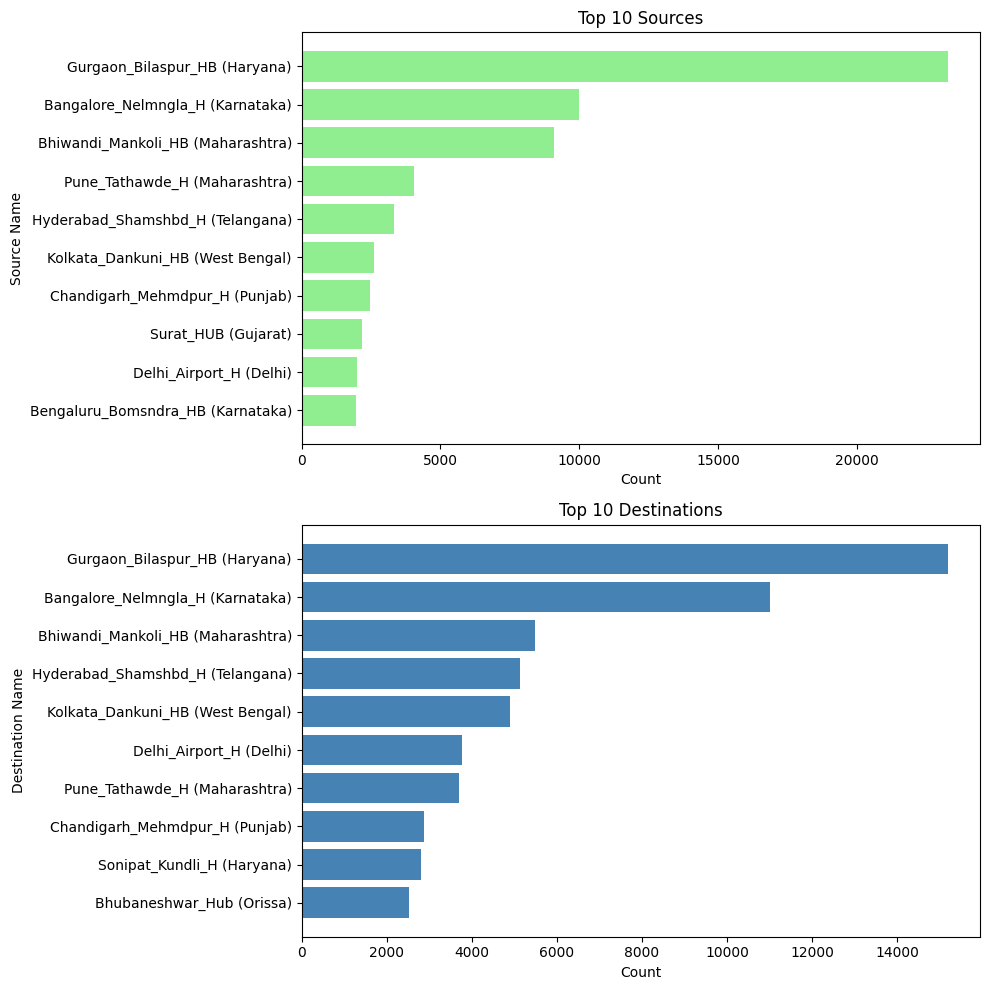

In [ ]:
# Prepare data
top_10_sources = df["source_name"].value_counts().head(10).to_dict()
top_10_destinations = df["destination_name"].value_counts().head(10).to_dict()

source_names = list(top_10_sources.keys())
source_counts = list(top_10_sources.values())

dest_names = list(top_10_destinations.keys())
dest_counts = list(top_10_destinations.values())

# Create vertically stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Top 10 Sources
axes[0].barh(source_names, source_counts, color='lightgreen')
axes[0].set_title("Top 10 Sources")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Source Name")
axes[0].invert_yaxis()

# Plot Top 10 Destinations
axes[1].barh(dest_names, dest_counts, color='steelblue')
axes[1].set_title("Top 10 Destinations")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Destination Name")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Trip Created by Months

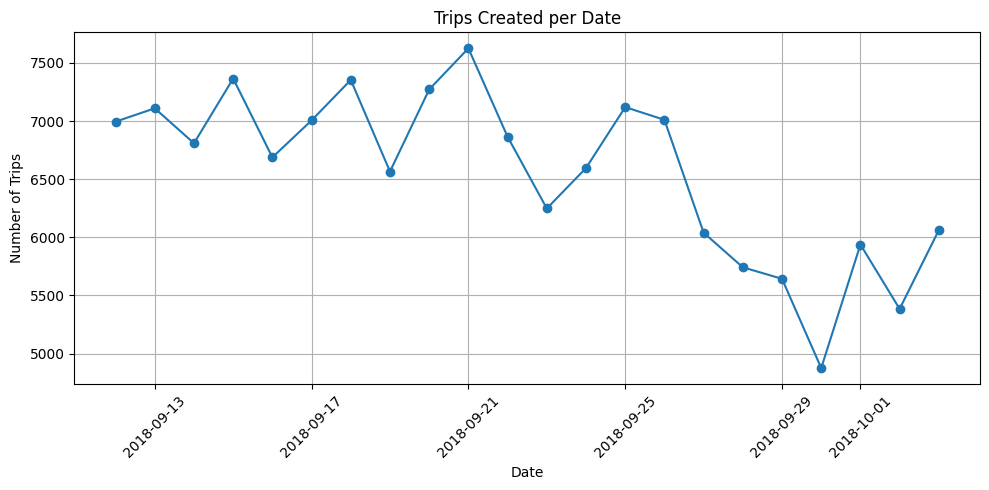

In [ ]:
daily_counts = df['trip_creation_time'].dt.to_period('d').value_counts().sort_index()

# Convert PeriodIndex to datetime for plotting
days = daily_counts.index.to_timestamp()
counts = daily_counts.values

# Plot
plt.figure(figsize=(10, 5))
plt.plot(days, counts, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Trips Created per Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()